In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%load_ext autoreload
%autoreload 2

In [2]:
# load the data set
df = pd.read_csv('heart_attack_dataset.csv')

In [3]:
#take a look at the top 5 rows to get a feel for what is present
df.head()

,gender,age,hypertension,high_cholesterol,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,heart_attack
0,Male,65.0,0,1,Yes,Private,Urban,235.5507,35.502,formerly smoked,1
1,Female,59.0,0,0,Yes,Self-employed,Rural,208.2763,NaN,never smoked,1
2,Male,78.0,0,1,Yes,Private,Rural,109.0976,31.525,never smoked,1
3,Female,47.0,0,0,Yes,Private,Urban,176.3669,33.368,smokes,1
4,Female,77.0,1,0,Yes,Self-employed,Rural,179.3436,23.280,never smoked,1


In [4]:
# how many rows and initial features
df.shape

(5110, 11)

In [5]:
# general descriptive statistics for the data set
df.describe(include='all')

,gender,age,hypertension,high_cholesterol,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,heart_attack
count,5110,5110.000000,5110.000000,5110.000000,5110,5110,5110,5110.000000,4909.000000,5110,5110.000000
unique,3,NaN,NaN,NaN,2,5,2,NaN,NaN,4,NaN
top,Female,NaN,NaN,NaN,Yes,Private,Urban,NaN,NaN,never smoked,NaN
freq,2994,NaN,NaN,NaN,3353,2925,2596,NaN,NaN,1892,NaN
mean,NaN,41.226614,0.101957,0.060078,NaN,NaN,NaN,109.332107,28.026440,NaN,0.048728
std,NaN,22.612647,0.302621,0.237655,NaN,NaN,NaN,46.642067,7.618445,NaN,0.215320
min,NaN,-1.920000,0.000000,0.000000,NaN,NaN,NaN,56.773600,9.991000,NaN,0.000000
25%,NaN,23.000000,0.000000,0.000000,NaN,NaN,NaN,79.562350,22.795000,NaN,0.000000
50%,NaN,43.000000,0.000000,0.000000,NaN,NaN,NaN,94.641550,27.257000,NaN,0.000000
75%,NaN,59.000000,0.000000,0.000000,NaN,NaN,NaN,117.512700,32.107000,NaN,0.000000


I can see above that this is a unbalanced data set and heart_attach positive class is underrepresented and that makes sense based on what I know about the frequency of heart attacks. Both avg_glucose_level and bmi seem to have very high max numbers but again, based on my experiences I understand that while these do seem to be outliers they do make sense and I am going to leave them in the set because I don't believe that they are errors. If this was a model going into production this assumption would be validated. 

In [6]:
# double check the imbalance
pd.crosstab(df['heart_attack'], columns = 'count')

col_0,count
heart_attack,
0,4861
1,249


In [7]:
# check for missing data
df.isna().sum() 

gender                 0
age                    0
hypertension           0
high_cholesterol       0
ever_married           0
work_type              0
residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
heart_attack           0
dtype: int64

We can see that bmi has some missing values. Due to not having any understanding about how the data was collected when feature engineering we are going to one hot encode to include missing as a new feature for bmi. In a production setting this decision would have to be validated with domain experts. It could be that due to some software but that values outside of range just aren't recorded or some other affect. 

<AxesSubplot:>

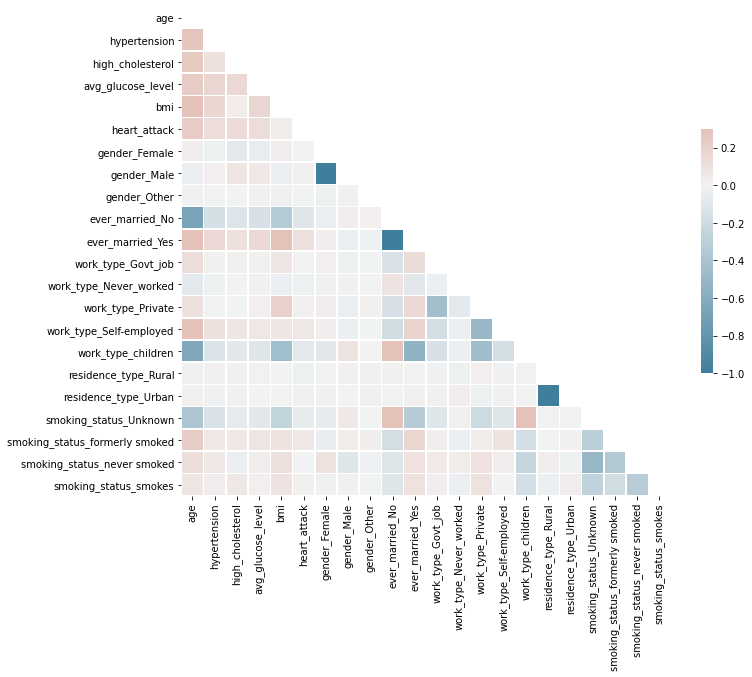

In [8]:
# lets take a look at correlation of the features, in order to do this everything needs to be numbers. 

#categorical data
categorical_cols = ['gender', 'ever_married', 'work_type', 'residence_type', 'smoking_status'] 

#import pandas as pd
dummies_df = pd.get_dummies(df, columns = categorical_cols)

# Compute the correlation matrix
corr = dummies_df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Here we can see a correlation matrix visualization. For the most part the data points with stronger correlations to heart_atttach seem reasonable. For instance age would definantly be a huge factor in heart attacks. Another interesting note is ever_married_Yes having some significance, I have read that marrage can increase happiness and longevity, so this is confirmed in the data. Due to the limited scope of this 4 ish hour project I am planning on using all of the data for the models. In a production environment pca or similar could be used for feature reduction which could help this process as there isn't much data. 

In [9]:
# split the data - this data preperation function was created as an example of how this would work
# in a project
from data_prep.data_prep import train_test_validation_split
X_train, X_test, X_validation, y_train, y_test, y_validation = train_test_validation_split(df)


In [10]:
# double check target is represented well in each group
# this look ok for this purposes, best to make it more even
print(pd.crosstab(y_train, columns = 'count'))
print(pd.crosstab(y_validation, columns = 'count'))
print(pd.crosstab(y_test, columns = 'count'))

col_0         count
heart_attack       
0              3417
1               160
col_0         count
heart_attack       
0               733
1                33
col_0         count
heart_attack       
0               711
1                56


These splits look ok.  Validation and Test aren't the same because the test train split didn't stratify them which is what you would do in production but for this quick example these look suitable. 

Random over-sampling:
0    3417
1    3417
Name: heart_attack, dtype: int64


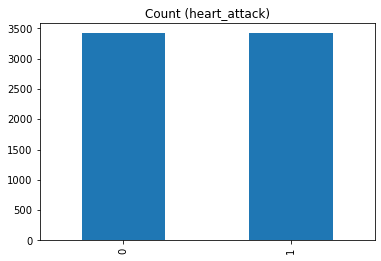

In [11]:
# the data set is unbalances and we need to address this
# I have had good success with oversampling and choose it for this example
# In a production setting a variaty of ways to 
# address this would be tried. 
train = X_train.copy()
train['heart_attack'] = y_train

count_class_0, count_class_1 = train.heart_attack.value_counts()

df_class_0 = train[train['heart_attack'] == 0]
df_class_1 = train[train['heart_attack'] == 1]

df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over.heart_attack.value_counts())

df_test_over = df_test_over.sample(frac=1)

df_test_over.heart_attack.value_counts().plot(kind='bar', title='Count (heart_attack)');

This looks good for our purposes

In [12]:
# get the data back into a usable state
y_train = df_test_over['heart_attack']
df_test_over.drop('heart_attack', axis = 1, inplace = True)
X_for_columns = X_train.copy()

In [13]:
# we need to prepare the categorical features for machine learning
# I save the X df with the dummies to keep the column names so that I can lign up the validation dataset
df_test_over = pd.get_dummies(df_test_over)
X_train = df_test_over.copy()
X_test = pd.get_dummies(X_test)
X_test.reindex(columns = X_train.columns, fill_value=0)

,age,hypertension,high_cholesterol,avg_glucose_level,bmi,gender_Female,gender_Male,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,residence_type_Rural,residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
1789,11.0,0,1,73.0579,22.213,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0
2478,5.0,0,0,161.5246,16.781,1,0,1,0,0,0,0,0,1,0,1,1,0,0,0
530,70.0,1,0,117.4303,30.846,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0
1813,76.0,1,0,60.4198,15.908,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0
3870,10.0,0,0,120.5512,17.557,0,1,1,0,0,0,0,0,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4288,41.0,1,0,58.6482,43.941,1,0,0,1,1,0,0,0,0,1,0,1,0,0,0
1412,80.0,1,0,234.0984,32.301,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0
3783,76.0,0,0,96.6655,22.019,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0
3456,70.0,1,0,108.6753,31.719,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0


There are various ways to prepare categorical features for machine learning I choose one hot encoding, a good alternative would be 
target encoding. For ease of use I chose to use pandas get_dummies method. You can use this method directly on the raw data which
is easy and quick. For production you would have to encode each of the features and then use a one hot encoder and handle new values 
gracefully. Similar handling would be neccesary for target encoding. 

In [14]:
# scale the data, there are many ways to do this, this is the first one I tried, for something that was more serious you would
# try various types depending on the models you are using

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
# the function to try out some models to see based on the data cleaning and feature engineering methods which one works best
# the obvious exlusion of model is xgboost as it does very well on this type of data but for times sake I stuck with some more
# commonly known names that are all in sklearn

from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC



def run_exps(X_train: pd.DataFrame, y_train: pd.DataFrame, X_test: pd.DataFrame, y_test: pd.DataFrame) -> pd.DataFrame:
    '''
    Lightweight script to test many models and find winners
    :param X_train: training split
    :param y_train: training target vector
    :param X_test: test split
    :param y_test: test target vector
    :return: DataFrame of predictions , classifiers in dict
    '''

    dfs = []

    models = [
        ('RF', RandomForestClassifier()),
        ('KNN', KNeighborsClassifier()),
        ('SVM', SVC()),
        ('GNB', GaussianNB())
    ]
    results = []
    names = []
    scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted', 'roc_auc']
    target_names = ['0', '1']
    classifiers = {}
    for name, model in models:
        kfold = model_selection.KFold(n_splits=5, shuffle=True, random_state=90210)
        cv_results = model_selection.cross_validate(model, X_train, y_train, cv=kfold, scoring=scoring)
        clf = model.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        print(name)
        print(classification_report(y_test, y_pred, target_names=target_names))
        results.append(cv_results)
        names.append(name)
        this_df = pd.DataFrame(cv_results)
        this_df['model'] = name
        dfs.append(this_df)
        final = pd.concat(dfs, ignore_index=True)
        classifiers[name] = clf
    return final, classifiers


In [16]:
# I was getting some nan/inf values, there weren't a lot and I didn't figure out why, this was a quick fix, in production
# you would figure out exactly what was happening and create a better solution
X_train = np.nan_to_num(X_train)
X_test = np.nan_to_num(X_test)

In [17]:
# this runs the ml function and prints the results of each model as well as returns the classifiers in a dictionary so that
# they can be used agains the validation set to confirm generalizability
final, classifiers = run_exps(X_train, y_train.values, X_test, y_test.values)

RF
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       711
           1       0.20      0.02      0.03        56

    accuracy                           0.92       767
   macro avg       0.56      0.51      0.50       767
weighted avg       0.87      0.92      0.89       767

KNN
              precision    recall  f1-score   support

           0       0.94      0.91      0.93       711
           1       0.20      0.29      0.24        56

    accuracy                           0.86       767
   macro avg       0.57      0.60      0.58       767
weighted avg       0.89      0.86      0.88       767

SVM
              precision    recall  f1-score   support

           0       0.96      0.82      0.89       711
           1       0.20      0.57      0.30        56

    accuracy                           0.81       767
   macro avg       0.58      0.70      0.59       767
weighted avg       0.91      0.81      0.84       767

GNB
    

In [18]:
# this df is the performance of each of the cross validation runs for each of the models
final

,fit_time,score_time,test_accuracy,test_precision_weighted,test_recall_weighted,test_f1_weighted,test_roc_auc,model
0,0.256605,0.037104,0.995611,0.995648,0.995611,0.995610,1.000000,RF
1,0.256351,0.037127,0.991953,0.992085,0.991953,0.991955,1.000000,RF
2,0.318490,0.036494,0.991953,0.992076,0.991953,0.991950,1.000000,RF
3,0.258913,0.036531,0.988296,0.988563,0.988296,0.988294,1.000000,RF
4,0.251336,0.036763,0.990483,0.990665,0.990483,0.990484,1.000000,RF
5,0.000630,0.300301,0.937089,0.944025,0.937089,0.936777,0.979198,KNN
6,0.000912,0.232582,0.940746,0.947241,0.940746,0.940669,0.981664,KNN
7,0.000589,0.220201,0.935625,0.942716,0.935625,0.935187,0.974085,KNN
8,0.000590,0.207358,0.924653,0.934501,0.924653,0.924210,0.964076,KNN
9,0.000575,0.234833,0.931186,0.939664,0.931186,0.930957,0.973458,KNN


In [19]:
X_validation.columns

Index(['gender', 'age', 'hypertension', 'high_cholesterol', 'ever_married',
       'work_type', 'residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status'],
      dtype='object')

In [20]:
set(X_validation.columns).difference(set(df_test_over.columns))

{'ever_married', 'gender', 'residence_type', 'smoking_status', 'work_type'}

In [21]:
# even with get_dummies I had to make a change and drop a collumn, for ease of use and time constraints I just dropped it, for sure
# not best practice. 

# prepare validation data for ml
X_validation = pd.get_dummies(X_validation)
X_validation.reindex(columns = df_test_over.columns, fill_value=0)
X_validation.drop('gender_Other', axis = 1, inplace = True)
X_validation = scaler.transform(X_validation)
X_validation = np.nan_to_num(X_validation)



              precision    recall  f1-score   support

           0       0.98      0.78      0.87       733
           1       0.11      0.64      0.19        33

    accuracy                           0.77       766
   macro avg       0.55      0.71      0.53       766
weighted avg       0.94      0.77      0.84       766



In [25]:
from sklearn.metrics import roc_auc_score

for classifier in classifiers:
    clf = classifiers[classifier]
    y_validation_prediction = clf.predict(X_validation)
    print(classifier)
    print(f'AUC {roc_auc_score(y_validation, y_validation_prediction)}')
    print(classification_report(y_validation, y_validation_prediction, target_names=['0', '1']))

RF
AUC 0.4979536152796726
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       733
           1       0.00      0.00      0.00        33

    accuracy                           0.95       766
   macro avg       0.48      0.50      0.49       766
weighted avg       0.92      0.95      0.93       766

KNN
AUC 0.5342924469800322
              precision    recall  f1-score   support

           0       0.96      0.89      0.92       733
           1       0.07      0.18      0.10        33

    accuracy                           0.86       766
   macro avg       0.51      0.53      0.51       766
weighted avg       0.92      0.86      0.89       766

SVM
AUC 0.7069949150440282
              precision    recall  f1-score   support

           0       0.98      0.78      0.87       733
           1       0.11      0.64      0.19        33

    accuracy                           0.77       766
   macro avg       0.55      0.71      0.53     

We see that the precision drops for the model that did the best durring training but that it overall is the best model at 
capturing the positive class based on recal and precision and has the least false positives. Not super great results. In a more
serious project the validation set would have been much more important. I didn't do any hyperparamater tuning but still wanted
to demonstrate that this step is critical because it suggests how generalizable the model is going to be. This is often a step
that is often missed. For instance the built in sklearn function for splitting data sets doesn't automatically do this so I 
wrapped its functionality to add the 3rd set. 

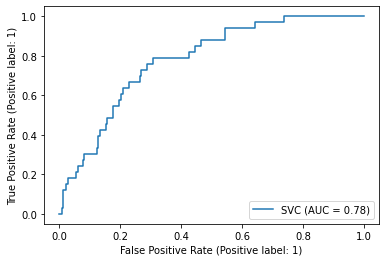

In [22]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(classifiers['SVM'], X_validation, y_validation)

ROC visualizations show the trade off between sensitivity (or TPR) and specificity (1 – FPR). For a classifier with a probability
output you can identify on the line where you want to be making predictions based on the used case. An interesting note is that the
AUC listed in the visualization is different than the one listed in the list of classifiers above. I didn't dig into this but 
this would be very important to lign these up. 